In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


# Задача 1.1

In [3]:
X.isnull().sum() # проверим есть ли пропуске в датасете wine


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Заметим, что пропущенных значений нет

In [4]:
X.dtypes # проверим есть ли категориальные признаки

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

Как мы видим, у нас только числовые признаки

# Задача 1.2

In [24]:
from sklearn.model_selection import train_test_split
np.random.seed(339) # поставим сид
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y) # разделим выборкуу


Использование аргумента stratify при разбиении является важным из-за того что это позволяет сохранить  репрезентативность и пропорции каждой группы в исходной выборке.


# Задача 1.3
На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр n_neighbours класса KNeighborsClassifier). Для обучения используйте только два признака: alcohol и magnesium – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля StandardScaler.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [28]:
normalizer = StandardScaler()
normalizer.fit(X_train) # обучим масштабирование на трейне
X_train_transformed = normalizer.transform(X_train) # применим масштабирование признаков на обучающей выборке
X_test_transformed = normalizer.transform(X_test) #применим масштабирование признаков на тестовой выборке
X_train_transformed = pd.DataFrame(X_train_transformed,columns = data['feature_names'])
X_test_transformed = pd.DataFrame(X_test_transformed,columns = data['feature_names'])

X_train_transformed1 =  X_train_transformed[['alcohol','magnesium']]
X_test_transformed1 =  X_test_transformed[['alcohol','magnesium']]
n_neighbors = [1, 3, 5, 10, 15, 25] # создадим список из числа соседей


In [29]:
print('NN \t Train \t Test ')
for n in n_neighbors:
  clf = KNeighborsClassifier(n_neighbors=n)
  clf.fit(X_train_transformed1, y_train)
  train_predictions = clf.predict(X_train_transformed1)
  test_predictions = clf.predict(X_test_transformed1)
  train_accuracy = accuracy_score(y_train, train_predictions)
  test_accuracy = accuracy_score(y_test, test_predictions)

  print(f"{n} \t {train_accuracy:.2f} \t {test_accuracy:.2f}")








NN 	 Train 	 Test 
1 	 1.00 	 0.61
3 	 0.80 	 0.63
5 	 0.75 	 0.72
10 	 0.77 	 0.69
15 	 0.75 	 0.63
25 	 0.73 	 0.61


# Задача 1.4

In [30]:
!pip install mlxtend

In [31]:
import mlxtend

# Задача 1.5


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

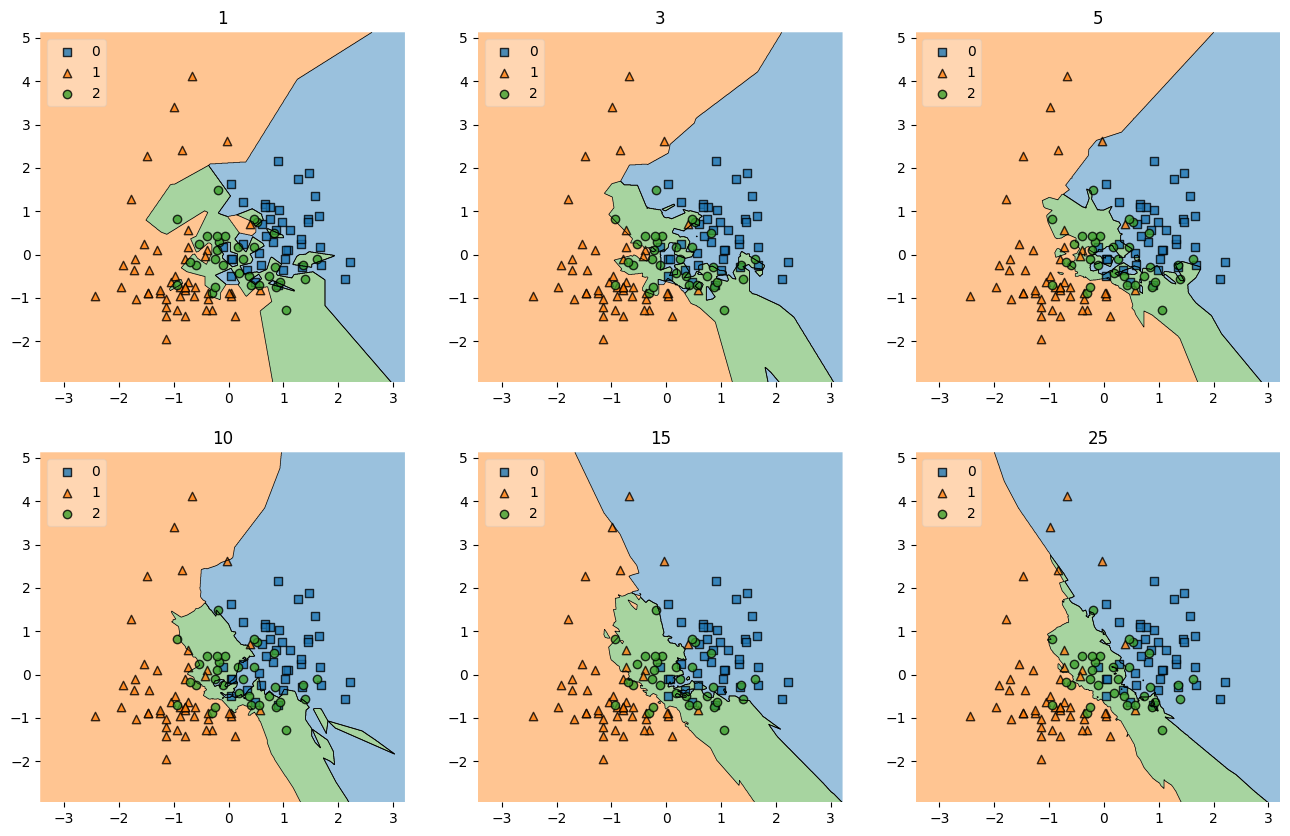

In [32]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(16,10))

labels = ['1', '3', '5', '10','15','25']
for n, lab, grd in zip(n_neighbors,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    clf = KNeighborsClassifier(n_neighbors=n, metric = 'euclidean')
    clf.fit(X_train_transformed1, y_train)
    X_train_np = X_train_transformed1.to_numpy()
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_np, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

# Задача 1.6

Можно заметить, что на тестовой выборке с ростом числа соседей accuracy растет, но затем начиная с числа соседей, равного 10, начинает падать. Таким образом оптимальным числом соседей будет являться число 5, где accuracy на тесте достигает максимального значения среди остальных, кроме того на обучающей выборке значение так же одно из наибольших, учитывая того, что мы не берем k = 1, где accuracy всегда равно 1.
Анализируя  графики, можно наблюдать, что даже визуально наиболее точным кажется число соседей, равное 5, в остальных случаях можно заметить неразумная классификация, так например, при n = 25 заметно, что в синих зонах, обьект оказывается оранжвым.  Кроме того, начиная с числа соседей, равного 10, можно сказать, что модель начинается переобучаться, из-за чего снижается accuracy.



# **Задание 2**

In [33]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X_train, self.y_train = X, y
      pass

    def predict(self, X):
      y_pred = []
      for i in X:
        distance = [self.count_distance(i, j) for j in self.X_train] # для  объектов находим расстояние между самим объектом и остальными из тренировочной выборки
        k_index = np.argsort(distance)[:self.k] # отсортируем объекты по расстоянию и выбираем k ближайщих
        obj = self.y_train[k_index] # каждому объекту присвоим свой класс
        y_pred.append(np.bincount(obj).argmax()) # подсчитываем классы и выбираем наиболее популярный из них
      return np.array(y_pred)




    def count_distance(self, x, y):
      return np.sqrt(np.sum((x - y) ** 2))
      pass

In [34]:
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])


In [35]:
test_knn(KNN)

## **Задание 3**



In [36]:
from google.colab import files

uploaded = files.upload()

Saving diamonds.csv to diamonds.csv


In [37]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Задача 3.1

In [38]:
y = data['price'] # создадим отдельно вектор значений целевой переменной, в нашем случае цены бриллианта, которую мы будем предсказывать
X = data.drop('price', axis=1) # отделим выборку

X.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [39]:
X.isnull().sum() # проверим, есть ли пропуски в нашем датасете

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
dtype: int64

Видим, что пропусков нет

In [40]:
X = X.drop('Unnamed: 0', axis = 1) # удалим признак, не содержащий никикаой дополнительной информации, в этом признаке лишь перечисены номера строк
data1 = data.drop('Unnamed: 0', axis = 1) # удалим признак, не содержащий никикаой дополнительной информации, в этом признаке лишь перечисены номера строк



# Задача 3.2

In [41]:
corr_matrix = data1.corrwith(y)
corr_matrix


<ipython-input-41-d6f46df7cfde>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data1.corrwith(y)


carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
dtype: float64

<ipython-input-42-a48c07313cda>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data1.corr(), cmap="Spectral", annot=True, fmt="0.2f")


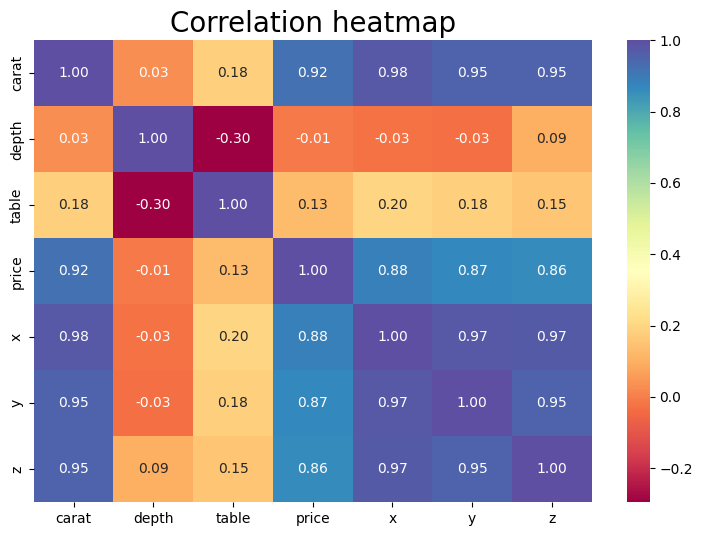

In [42]:
import seaborn as sns
plt.figure(figsize=(9, 6))
ax = sns.heatmap(data1.corr(), cmap="Spectral", annot=True, fmt="0.2f")
plt.title('Correlation heatmap', fontsize=20)
for t in ax.texts:
    if np.abs(float(t.get_text())):
        t.set_text(t.get_text())
    else:
        t.set_text("")

Можно заметить, что наибольшую линейную зависимость имеет признак carat, также выделяются  с очень сильными связими такие признаки, как x,y,z

# Задача 3.3

In [43]:
X = pd.get_dummies(X, drop_first=False) #закодируем категориальные признаки
X.head(5)

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


## Задача 3.4

In [44]:
np.random.seed(42) # поставим сид
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # разобьем выборку

# Задача 3.5

In [45]:
normalizer = StandardScaler()
normalizer.fit(X_train)
X_train_scaled = normalizer.transform(X_train)
X_test_scaled = normalizer.transform(X_test)
X_train_scaled = pd.DataFrame(data = X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns = X_test.columns)

X_train_scaled

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.862659,-0.311437,-0.207099,1.055581,0.986556,0.968253,-0.175082,-0.314881,1.227398,-0.585893,...,-0.333294,-0.234494,-0.117361,-0.184885,-0.568277,-0.451216,-0.422668,-0.542475,-0.270252,3.121212
1,-1.029889,0.178549,-0.656213,-1.207734,-1.202544,-1.168276,-0.175082,-0.314881,1.227398,-0.585893,...,-0.333294,-0.234494,-0.117361,-0.184885,-0.568277,-0.451216,-0.422668,1.843403,-0.270252,-0.320388
2,0.862659,0.458541,-0.207099,0.904099,0.951670,0.982309,-0.175082,-0.314881,1.227398,-0.585893,...,-0.333294,-0.234494,-0.117361,-0.184885,-0.568277,-0.451216,2.365922,-0.542475,-0.270252,-0.320388
3,0.021527,0.598537,-1.105327,0.164512,0.192898,0.251391,-0.175082,-0.314881,1.227398,-0.585893,...,-0.333294,-0.234494,-0.117361,-0.184885,-0.568277,2.216235,-0.422668,-0.542475,-0.270252,-0.320388
4,-0.020530,-0.031445,-0.656213,0.182333,0.184176,0.181110,-0.175082,-0.314881,1.227398,-0.585893,...,3.000353,-0.234494,-0.117361,-0.184885,-0.568277,-0.451216,-0.422668,-0.542475,-0.270252,3.121212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37753,0.526206,0.458541,0.691128,0.663511,0.672581,0.715243,-0.175082,-0.314881,-0.814732,-0.585893,...,3.000353,-0.234494,-0.117361,-0.184885,-0.568277,-0.451216,-0.422668,1.843403,-0.270252,-0.320388
37754,-0.693436,-0.521432,-1.105327,-0.628540,-0.635646,-0.676312,-0.175082,-0.314881,1.227398,-0.585893,...,-0.333294,-0.234494,-0.117361,-0.184885,-0.568277,-0.451216,2.365922,-0.542475,-0.270252,-0.320388
37755,-0.987832,-1.011418,0.242014,-1.109717,-1.115329,-1.182333,-0.175082,-0.314881,-0.814732,-0.585893,...,-0.333294,-0.234494,-0.117361,5.408771,-0.568277,-0.451216,-0.422668,-0.542475,-0.270252,-0.320388
37756,0.210782,0.738533,0.691128,0.351636,0.253949,0.391952,-0.175082,-0.314881,-0.814732,1.706796,...,-0.333294,4.264502,-0.117361,-0.184885,1.759705,-0.451216,-0.422668,-0.542475,-0.270252,-0.320388


# Задача 3.6

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


# Обучаем модель на тренировочной выборке
lr.fit(X_train_scaled, y_train)


# Вычисляем предсказанные значения
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)



# Вычисляем MSE на тренировочной и тестовой выборке
MSE_train = np.mean((y_train - y_pred_train) ** 2)
MSE_test = np.mean((y_test - y_pred_test) ** 2)


In [47]:
print(MSE_train) #выведем среднеквадратичную ошибку на тренировочной выборке
print(MSE_test) #выведем среднеквадратичную ошибку на тренировочной выборке




1290541.9147450614
1244765.4357158707


# Задача 3.7

In [48]:
for name, coef in zip( X_train_scaled, lr.coef_):  # выведем коэффициенты признаков с названиями
    print(f"{name}: {coef}")
print("b0:", lr.intercept_)

carat: 5338.615670614762
depth: -90.17381703342323
table: -60.33227991027918
x: -1100.4188500393166
y: -6.458916720538805
z: -34.25894462089235
cut_Fair: -125.7110034412052
cut_Good: -41.39598920939747
cut_Ideal: 51.99220579030468
cut_Premium: 16.46474064458982
cut_Very Good: 1.3708073124382467
color_D: 211.31054123871525
color_E: 162.4826714410842
color_F: 139.7702352224842
color_G: 56.166466787025335
color_H: -130.49754248396115
color_I: -251.21000158162613
color_J: -387.4978278456525
clarity_I1: -473.8257100444955
clarity_IF: 244.2233565041849
clarity_SI1: -146.57593767851893
clarity_SI2: -491.4787844607689
clarity_VS1: 202.57492339556688
clarity_VS2: 102.1803103878024
clarity_VVS1: 253.97293766136386
clarity_VVS2: 271.7804759281613
b0: 3951.4953122517086


Можно заметить, что на фоне остальных особо выделяются оценки таких признаков, как carat и x(длина), их оценки коэффициентов по модулю на порядок превышают оценки прочих вещественных переменных.

# Задача 3.8

In [49]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error # для удобства импортитруем MSE, которая будет автоматически среднекватрическую ошибку
lasso = Lasso(10.0).fit(X_train_scaled, y_train)


print("Lasso")
print(f"Train: {mean_squared_error(y_train, lasso.predict(X_train_scaled))}")
print(f"Test: {mean_squared_error(y_test, lasso.predict(X_test_scaled))}")

ridge = Ridge(10.0).fit(X_train_scaled, y_train)

print()
print("Ridge")
print(f"Train: {mean_squared_error(y_train, ridge.predict(X_train_scaled))}")
print(f"Test: {mean_squared_error(y_test, ridge.predict(X_test_scaled))}")

Lasso
Train: 1301845.4182150303
Test: 1255869.1012984836

Ridge
Train: 1290606.6065357039
Test: 1244998.7712435164


In [50]:
# Вывыдем веса признаков, используя Lasso

for name, coef in zip( X_train_scaled, lasso.coef_):  # выведем коэффициенты признаков с названиями
    print(f"{name}: {coef}")
print("b0:", lasso.intercept_)

carat: 4872.156395555542
depth: -57.093610226801644
table: -47.68485714025148
x: -652.157442236506
y: -0.0
z: -43.26536087565864
cut_Fair: -126.50426086138296
cut_Good: -42.8093219815303
cut_Ideal: 41.69581461311703
cut_Premium: 0.0
cut_Very Good: -0.0
color_D: 147.94933994739327
color_E: 92.66322385141818
color_F: 69.13936020331232
color_G: -0.0
color_H: -172.35946256725765
color_I: -279.0145771370216
color_J: -403.03069842773806
clarity_I1: -488.72730005583065
clarity_IF: 194.05330181892637
clarity_SI1: -252.33566450272423
clarity_SI2: -573.6356366611011
clarity_VS1: 101.29825449161235
clarity_VS2: -0.0
clarity_VVS1: 187.4992627278212
clarity_VVS2: 193.99715195310327
b0: 3951.4953122517086


In [51]:
# Вывыдем веса признаков, используя Ridge

for name, coef in zip( X_train_scaled, ridge.coef_):  # выведем коэффициенты признаков с названиями
    print(f"{name}: {coef}")
print("b0:", ridge.intercept_)

carat: 5301.289061920845
depth: -87.63980472671899
table: -60.123686116655385
x: -1057.2288879020093
y: -9.60514861060856
z: -38.071544191101
cut_Fair: -125.88000002019884
cut_Good: -41.48035465366496
cut_Ideal: 51.96903600640098
cut_Premium: 16.449545373371105
cut_Very Good: 1.5403312958795952
color_D: 211.0558419945046
color_E: 162.24693127269725
color_F: 139.29613456734415
color_G: 55.9072865189255
color_H: -130.20241964425452
color_I: -250.58103419472425
color_J: -386.7511014987874
clarity_I1: -473.3213967393165
clarity_IF: 244.5751563517525
clarity_SI1: -147.09658634711224
clarity_SI2: -491.313751743936
clarity_VS1: 202.3593507047547
clarity_VS2: 102.00044669462665
clarity_VVS1: 254.44698822014806
clarity_VVS2: 272.0344746344496
b0: 3951.4953122517086


Можем заметить что веса в Ridge совсем немного изменились в сравнении с обычной линейной регрессией, кроме того практически MSE остался практическим таким же на двух выборках.

Анализируя Lasso, можно проследить значительные изменения, веса признаков уменьшились, а также некоторые из них занулились, что скорее всего послужило к увелечинию функционала ошибки, который стал больше.

# Задача 3.9


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.498e+08, tolerance: 6.061e+07
  model = cd_fast.enet_coordinate_descent(


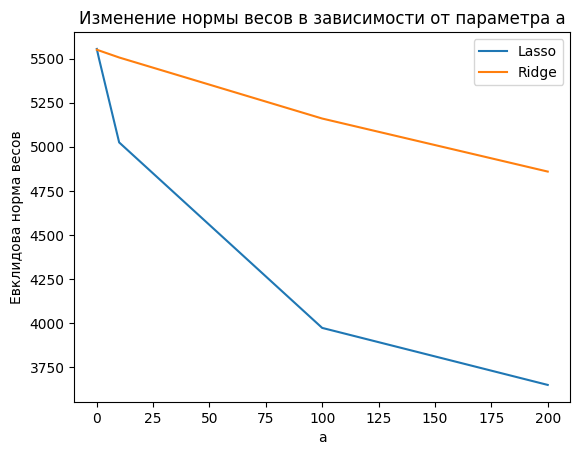

In [52]:
alphas = [0.1,1,10,100,200] # создадим список параметров регуляризации
lasso_vec = []
ridge_vec = []

# Обучаем Lasso- и Ridge-регрессии для каждого значения параметра a
for a in alphas:
    lasso_model = Lasso(alpha=a)
    ridge_model = Ridge(alpha=a)
    lasso_model.fit(X_train_scaled, y_train)
    ridge_model.fit(X_train_scaled, y_train)
    lasso_vec.append(np.linalg.norm(lasso_model.coef_))
    ridge_vec.append(np.linalg.norm(ridge_model.coef_))

plt.plot(alphas, lasso_vec, label='Lasso')
plt.plot(alphas, ridge_vec, label='Ridge')
plt.xlabel('a')
plt.ylabel('Евклидова норма весов')
plt.title('Изменение нормы весов в зависимости от параметра a')
plt.legend()


Lasso-регрессия более агрессивно уменьшает веса по сравнению с Ridge-регрессией. Ее часто используют для отбора признаков, так как она может занулять коэффициенты при незначительных признаках, делая модель более интерпретируемой и простой. Это происходит из-за того, что Lasso-регрессия использует L1-регуляризацию, которая способствует разреженности решения.

# Задача 3.10


In [53]:
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(cv=5)


# Обучим модель на тренировочных данных
lasso_cv_model.fit(X_train_scaled, y_train)
errors = lasso_cv_model.mse_path_

# Усредним ошибок по строкам
mse = np.mean(errors, axis=1)

# Выбор оптимального значения параметра alpha
optimal_a = lasso_cv_model.alphas_[np.argmin(mse)]

print("Оптимальное значение alpha:", optimal_a)


Оптимальное значение alpha: 3.6927928396722316


# Задача 3.11

In [54]:
lasso1 = Lasso(optimal_a).fit(X_train_scaled, y_train)

for name, coef in zip( X_train_scaled, lasso1.coef_):  # выведем коэффициенты признаков с названиями
    print(f"{name}: {coef}")
print("b0:", lasso1.intercept_)

carat: 5165.07722356014
depth: -77.87428351043012
table: -55.54244116109261
x: -936.9628926973933
y: -0.0
z: -38.22077273084126
cut_Fair: -129.8261117877134
cut_Good: -48.43309931499404
cut_Ideal: 37.12706959441633
cut_Premium: 0.0
cut_Very Good: -8.09581958113926
color_D: 158.9919004592382
color_E: 103.00446148904693
color_F: 80.24087411501336
color_G: -0.0
color_H: -177.60613341662233
color_I: -287.6641273398593
color_J: -412.63430244536625
clarity_I1: -497.087232823424
clarity_IF: 198.20173151095867
clarity_SI1: -251.71733244781686
clarity_SI2: -579.4542293186621
clarity_VS1: 110.01830551676619
clarity_VS2: -0.0
clarity_VVS1: 190.68334682992315
clarity_VVS2: 198.34359506752523
b0: 3951.4953122517086


Можно сделать, вывод, что некоторые коэффициенты занулились, то есть в данной модели оказались неинформативными, в нашем случае, это ширина и одни из видов разреза, цвета и чистоты бриллианта. Наиболее значимыми оказались вес и длина бриллианта, так веса этих признаков очень большие, что еще раз подчеркивает важность данных компонент. Действительно, люди в основном обращают внимание на карат бриллианта и его длину, что и формирует стоимость.

# Задача 3.12

In [55]:
print(f"Linear Regression: {MSE_test}")
print(f"Lasso optimalTest: {mean_squared_error(y_test, lasso1.predict(X_test_scaled))}")

Linear Regression: 1244765.4357158707
Lasso optimalTest: 1246265.7772307144


Подводя итоги, можно сказать Lasso модель оказалась немного хуже, чем при обычной линейной регрессия, это можно объяснить тем, что Lasso модель могла занулить некоторые важные признака, из-за чего функционал ошибки вырос, поэтому при данном сиде для предсказаний лучше использовать обычную линейную регрессию.